In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
raw_data = np.loadtxt("/content/RecordSession_2021.11.22_13.20.43.csv", delimiter = ',')


# Labeling Data

In [ ]:
total_data_len = len(raw_data[0])
total_rows = len(raw_data)
print(total_data_len)
print(total_rows)

31400
8


In [ ]:
data = raw_data[:, 6000:total_data_len]

In [ ]:
cut_data_len = len(data[0])
print(cut_data_len)

25400


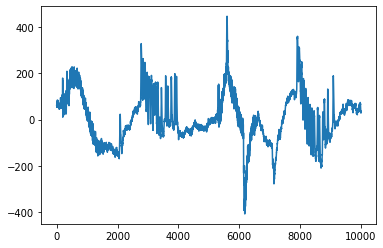

In [ ]:
plt.plot(data[0, 0:10000])

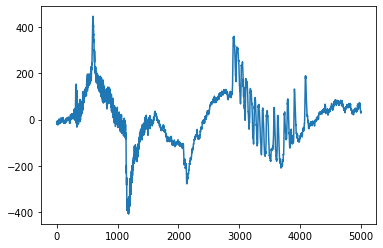

In [ ]:
plt.plot(data[0, 5000:10000])

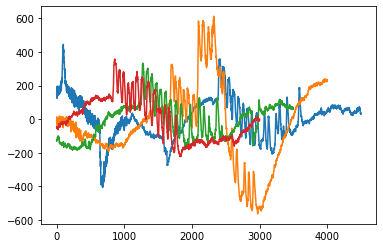

In [ ]:
for i in range(10):
  plt.plot(data[0, 5500*(i+1):5000*(i+2)])

# Seeing where the jaw clenches happened


In [ ]:
def plot_each_interval(row, start, end, interval):
  for i in range(10):
    #plt.figure(i)
    plt.plot(data[row, (start + i*interval):(end + i*interval)])
    #plt.ylim(-100, 200)
    #plt.xlim(0, 1308)
    plt.title("Interval " + str(i) +  ", Row " + str(row))

    

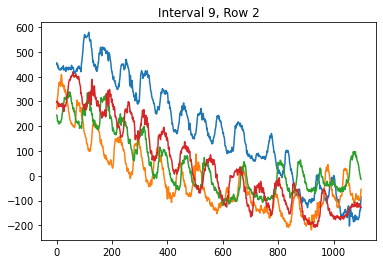

In [ ]:
plot_each_interval(2, 7800, 8900, 5000)

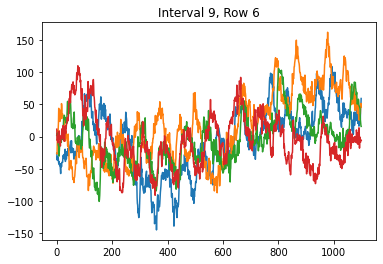

In [ ]:
plot_each_interval(6, 7800, 8900, 5000)

# Filling in the truths based on the intervals with jaw clenches

In [ ]:
truths = np.zeros(cut_data_len)
print(truths)
print(len(truths))

[0. 0. 0. ... 0. 0. 0.]
25400


In [ ]:
def fill_truths(start, end, interval):
  #truths = np.zeros(cut_data_len)
  for i in range(4):
    for j in range(start + i*interval, end + i*interval):
      truths[j] = 1

In [ ]:
fill_truths(2700, 4000, 5000)

# Visualizing the truths

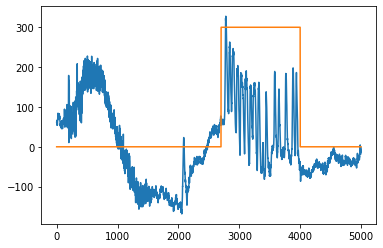

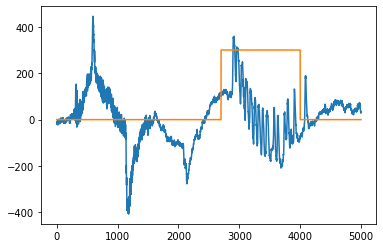

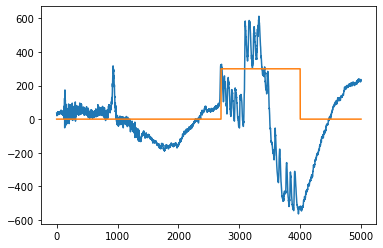

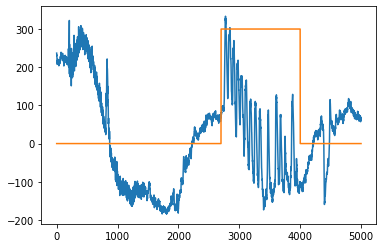

<Figure size 432x288 with 0 Axes>

In [ ]:
cut = 5000
for i in range(4):
  plt.plot(data[0, i*cut:(i+1)*cut])
  plt.plot(truths[i*cut:(i+1)*cut]*300)
  plt.figure()

In [ ]:
truths1 = [truths]
truth_data = np.append(data, truths1, axis=0)

In [ ]:
print(truth_data)

[[ 62.      64.89    64.656  ...  59.352   58.343   60.845 ]
 [106.42   109.59   111.18   ...  -3.6635  -5.7657  -4.0566]
 [165.52   166.49   166.75   ...  27.606   21.747   24.43  ]
 ...
 [ 61.002   74.082   73.662  ... -13.488   -2.7763   5.5216]
 [ 72.369   89.364   90.105  ... -14.762    7.5606  26.207 ]
 [  0.       0.       0.     ...   0.       0.       0.    ]]


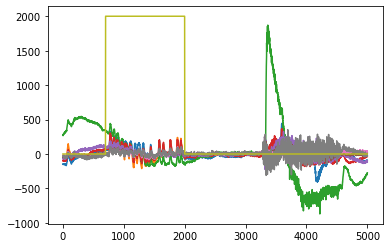

In [ ]:
expanded_truths = truths*2000
expanded_truths1 = [expanded_truths]
expanded_truth_data = np.append(data, expanded_truths1, axis=0)
for i in range(len(expanded_truth_data)):
  plt.plot(expanded_truth_data[i, 2000:7000])

In [ ]:
print(truth_data)

[[ 62.      64.89    64.656  ...  59.352   58.343   60.845 ]
 [106.42   109.59   111.18   ...  -3.6635  -5.7657  -4.0566]
 [165.52   166.49   166.75   ...  27.606   21.747   24.43  ]
 ...
 [ 61.002   74.082   73.662  ... -13.488   -2.7763   5.5216]
 [ 72.369   89.364   90.105  ... -14.762    7.5606  26.207 ]
 [  0.       0.       0.     ...   0.       0.       0.    ]]


# Attempting to classify using neural networks

In [ ]:
# Classifier
truths_row = 8
pred_row = 0

In [ ]:
# Transforming X data into kernel of a certain size


kernel_size = 200
kernel_movement = 50


new_X_length = int((len(truth_data[0]) - kernel_size)/kernel_movement)
print(new_X_length)

new_X = np.empty((0,kernel_size), int)
new_Y = np.zeros(new_X_length + 1)


#print(new_Y)
#print(new_X)


for i in range(new_X_length + 1):
  new_X_fragment = np.array([truth_data[pred_row, i*kernel_movement:i*kernel_movement+kernel_size]])
  #print(new_X_fragment)
  new_X = np.append(new_X, new_X_fragment, axis=0)
  y_average = int(np.average(truth_data[truths_row, i*kernel_movement:i*kernel_movement+kernel_size]))
  new_Y[i] = y_average

#print(new_X)
#print(new_Y)

split_cutoff = int(new_X_length/2)
print(len(truth_data[0]))
print(new_X_length)

504
25400
504


In [ ]:
print(len(new_X[0]))

200


In [ ]:
print(new_Y)
print(len(new_Y))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [ ]:
# Predict on row 0

trainX = new_X[0:split_cutoff]
testX = new_X[split_cutoff:]

trainY = new_Y[0:split_cutoff]
testY = new_Y[split_cutoff:]


In [ ]:
print(len(trainY))

252


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Scale the training data!
scaler.fit(trainX)
scaled_trainX = scaler.transform(trainX)
scaled_testX = scaler.transform(testX)

#print("Variance: ", trainX.var(axis=0)) #every variance should be 1
#print("Mean: ", trainX.mean(axis=0)) #every mean should be 0 or very close to 0

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

# Initialize a neural network as described above
neural_net = MLPClassifier(hidden_layer_sizes = (5, 3), random_state = 1, max_iter = 300)
# 2 hidden layers of sizes 5 and 3.

In [ ]:
neural_net.fit(scaled_trainX, trainY)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(hidden_layer_sizes=(5, 3), max_iter=300, random_state=1)

In [ ]:
# Exercise:
# 1. Predict on the training data
trainY_pred = neural_net.predict(scaled_trainX)

# 2. Calculate the training accuracy
acc = metrics.accuracy_score(trainY, trainY_pred, normalize=True)
print(acc)

0.9563492063492064


In [ ]:
testY_pred = neural_net.predict(scaled_testX)

acc = metrics.accuracy_score(testY, testY_pred, normalize=True)
print(acc)

0.83399209486166


In [ ]:
print(trainY_pred)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
print(len(data[0]))
print(len(trainY))

trainY_pred_plot = np.zeros(len(data[0]))
trainY_plot = np.zeros(len(data[0]))
testY_plot = np.zeros(len(data[0]))
testY_pred_plot = np.zeros(len(data[0]))

for i in range(252):
  big_index = i * 50
  trainY_pred_plot[big_index] = trainY_pred[i]
  trainY_plot[big_index] = trainY[i]
  testY_plot[big_index + 12700] = testY[i]
  testY_pred_plot[big_index + 12700] = testY_pred[i]


print(len(trainY_pred_plot))

25400
252
25400


In [ ]:
print(np.sum(trainY_plot))
print(np.sum(testY_plot))

46.0
46.0


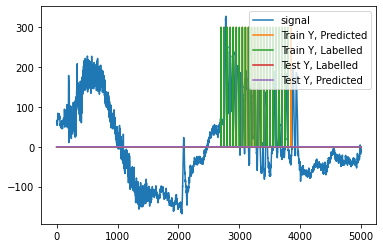

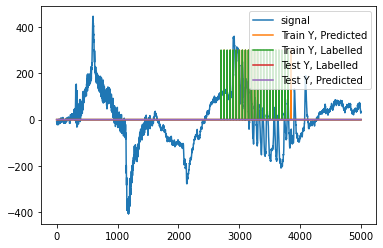

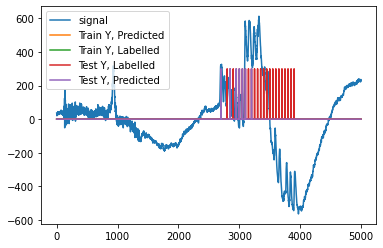

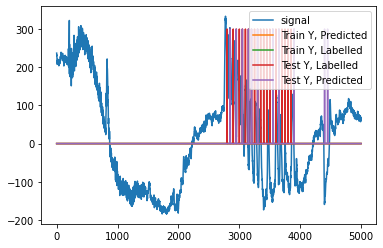

<Figure size 432x288 with 0 Axes>

In [ ]:
cut = 5000
trainY_len = len(trainY)
for i in range(4):
  plt.plot(data[0, i*cut:(i+1)*cut], label = 'signal')
  plt.plot(trainY_pred_plot[i*cut:(i+1)*cut]*300, label = 'Train Y, Predicted')
  plt.plot(trainY_plot[i*cut:(i+1)*cut]*300, label = 'Train Y, Labelled')
  plt.plot(testY_plot[i * cut:(i+1) * cut]*300, label = 'Test Y, Labelled')
  plt.plot(testY_pred_plot[i*cut :(i+1)*cut]*300, label = 'Test Y, Predicted')
  plt.legend()
  plt.figure()


# Looking at mixed data

In [ ]:
raw_mixed_data = np.loadtxt("/content/RecordSession_2021.11.22_13.38.42.csv", delimiter = ',')


OSError: ignored

In [ ]:
plt.plot(raw_mixed_data[0])
mixed_data = raw_mixed_data[:, 7000:]
plt.figure()
plt.plot(mixed_data[0])

In [ ]:
cut = 2000
for i in range(8):
  plt.plot(mixed_data[0, i*cut:(i+1)*cut])
  plt.figure()
  plt.ylim(-200, 400)